## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
unique_mice = mouse_study_combined['Mouse ID'].unique()
mouse_total = len(unique_mice)
mouse_total


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# check to see if there are duplicates for Mouse ID and Timepoint
dup = mouse_study_combined.duplicated(subset=['Mouse ID','Timepoint']).any()


# mouse_study_combined['Mouse ID'].value_counts()
# Found the duplicate mouse is g989

dup


True

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# set index to Mouse ID
mouse_data = mouse_study_combined.set_index('Mouse ID')
# check mouse data for ID g989
g989 = mouse_data.loc['g989',:]
g989

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [9]:
# drop everything associated with Mouse ID g989
mouse_study_combined.drop(mouse_study_combined[mouse_study_combined['Mouse ID'] == 'g989'].index, inplace = True)
print(mouse_study_combined)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [10]:
# check to see if there are remaining duplicates for Mouse ID and Timepoint
duplicate = mouse_study_combined.duplicated(subset=['Mouse ID','Timepoint']).any()
duplicate

False

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_combined['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = mouse_study_combined.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_tumor_volume = tumor_volume.mean()
#mean_tumor_volume

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median_tumor_volume = tumor_volume.median()
#median_tumor_volume

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
var_tumor_volume = tumor_volume.var()
#var_tumor_volume

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
stdev_tumor_volume = tumor_volume.std()
#stdev_tumor_volume

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem_tumor_volume = tumor_volume.sem()
#sem_tumor_volume

# Convert to DataFrame
drug_tumor_summary = pd.DataFrame({
                                "Mean Tumor Volume" : mean_tumor_volume, 
                                "Median Tumor Volume" : median_tumor_volume, 
                                "Tumor Volume Variance" : var_tumor_volume,
                                "Tumor Volume Stdev" : stdev_tumor_volume,
                                "Tumor Volume SEM" : sem_tumor_volume})

# Preview DataFrame
drug_tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_volume = mouse_study_combined.groupby('Drug Regimen').agg(
        Mean_Tumor_Volume = ('Tumor Volume (mm3)', np.mean),
        Median_Tumor_Volume = ('Tumor Volume (mm3)', np.median),
        Variance_Tumor_Volume = ('Tumor Volume (mm3)', np.var),
        Stdev_Tumor_Volume = ('Tumor Volume (mm3)', np.std),
        SEM_Tumor_Volume = ('Tumor Volume (mm3)', st.sem)
)

drug_tumor_volume

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen = mouse_study_combined['Drug Regimen'].unique()
x_axis = np.arange(len(drug_regimen))

# drop all duplicate mice
no_dupe_mice = mouse_study_combined.drop_duplicates(subset=['Mouse ID'])
#no_dupe_mice

# get mice counts per drug
drug_counts = no_dupe_mice["Drug Regimen"].value_counts()
drug_counts



Placebo      25
Naftisol     25
Ketapril     25
Zoniferol    25
Ceftamin     25
Infubinol    25
Capomulin    25
Ramicane     25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [45]:
no_dupe_mice.plot.bar(x="Drug Regimen", y=drug_counts)

IndexError: index 25 is out of bounds for axis 0 with size 8

In [16]:
# Placeholder for drug list 
# ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

Text(0, 0.5, 'Mice Count')

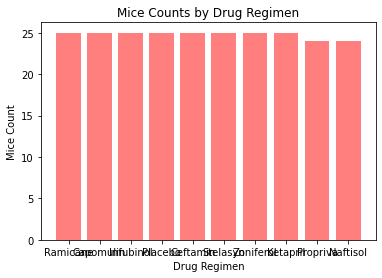

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(x_axis, drug_counts , color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
plt.title("Mice Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x21c3b700970>,
 [Text(-0.7596387291279785, -0.9289504837228032, 'Male Mice'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female Mice')],
 [Text(-0.4431225919913207, -0.5418877821716351, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

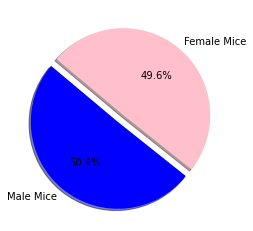

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Male Mice", "Female Mice"]
mouse_sex = no_dupe_mice["Sex"].value_counts()
colors = ["blue", "pink"]
explode = (0.1, 0)
#mouse_sex
plt.pie(mouse_sex, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_mice = []
ramicane_mice = []
infubinol_mice = []
ceftamin_mice = []

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
included_drugs = mouse_study_combined.set_index('Drug Regimen')
included_drugs = included_drugs.drop(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
#included_drugs['Mouse ID'].value_counts()

# get mouse count per drug
mouse_d = included_drugs.groupby('Drug Regimen')['Mouse ID'].unique()
mouse_d

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen
Capomulin    [s185, x401, m601, f966, u364, y793, r554, m95...
Ceftamin     [a275, b447, b487, b759, f436, h531, j296, k21...
Infubinol    [a203, a251, a577, a685, c139, c326, c895, e47...
Ramicane     [k403, g791, s508, m546, z578, j913, n364, c75...
Name: Mouse ID, dtype: object

In [ ]:
for row in included_drugs:
    if included_drugs['Drug Regimen'] == 'Capomulin':
        capomulin_mice.append(included_drugs['Mouse ID'])
    elif included_drugs['Drug Regimen'] == 'Ramicane':
        ramicane_mice.append(included_drugs['Mouse ID'])
    elif included_drugs['Drug Regimen'] == 'Infubinol':
        infubinol_mice.append(included_drugs['Mouse ID'])
    else:
        ceftamin_mice.append(included_drugs['Mouse ID'])
        
capomulin_mice

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ["red", "blue", "green", "yellow"]
markers = ["o","^","s","d"]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
